In [1]:
import torch
import pickle
import librosa
import soundfile as sf
import IPython.display as ipd

from constants import *
from inferer import Inferer
from plotter import plot_waves
from disk_utils import load_model

In [2]:
with open("dataset/features/min_max.pkl", "rb") as handle:
    min_max = pickle.load(handle)

inst = "ney"
feature = "db"
mini = min_max[inst]["min"][feature]
maxi = min_max[inst]["max"][feature]

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model("generator_sp_32")

In [35]:
signal, _ = librosa.load("dataset/tests/test_3.wav", mono=True, sr=SR)

In [40]:
inferer = Inferer(model, device, mini, maxi,
                  WINDOW_SAMPLE_LEN, OVERLAP, N_FFT, HOP)
result = inferer.infer(signal, use_gl=True, verbose=True)

Getting predictions...
  predicted 1/12
  predicted 2/12
  predicted 3/12
  predicted 4/12
  predicted 5/12
  predicted 6/12
  predicted 7/12
  predicted 8/12
  predicted 9/12
  predicted 10/12
  predicted 11/12
  predicted 12/12
Inverting predictions...
  inverted 1/12
  inverted 2/12
  inverted 3/12
  inverted 4/12
  inverted 5/12
  inverted 6/12
  inverted 7/12
  inverted 8/12
  inverted 9/12
  inverted 10/12
  inverted 11/12
  inverted 12/12
Stitching predictions...
Stitching complete!


In [41]:
ipd.Audio(signal, rate=SR)

In [42]:
ipd.Audio(result, rate=SR)

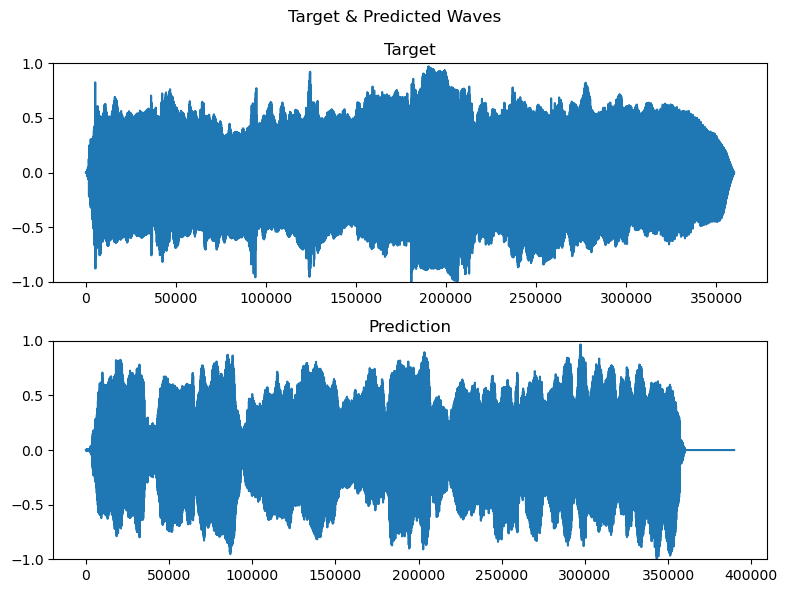

In [39]:
plot_waves(signal, result)

In [7]:
sf.write("katip_subpix_32.wav", result, SR, format="wav")